In [ ]:
#![LaSPACE_logo.jpg](attachment:LaSPACE_logo.jpg)



# Making NASA’s Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets

## LURA Project 2020-2021


LURA Project Title: "Making NASA's Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets" <br> This research grant was awarded by the Louisiana Space Grant Consortium (LaSPACE). URL: https://laspace.lsu.edu/about-us/. <br> LaSPACE Grant Number: ##---TBA---##, Primary NASA Grant Number: 80NSSC20M0110.


Project P.I.: Dr. Dhan Lord B. Fortela <br> Apprentice Student: Ashton C. Fremin <br> Department of Chemical Engineering, University of Louisiana at Lafayette, URL: https://chemical.louisiana.edu/


Recent Notebook Revision: 23 June 2021


## Notebook Overview:

This Jupyter Notebook is running Python shows that step-by-step workflow from the download to the analysis of the MAVEN datasets.

The PyDIVIDE package is used to download the MAVEN datasets and to perform som graphical analysis of the data. It was created by the MAVEN Team at the University of Colorado - Boulder: https://github.com/MAVENSDC/Pydivide. It is main used in this project to download and read the datasets.

The Self-Organizing Map (SOM) package is available from this GitHub repository: https://github.com/sevamoo/SOMPY.git.

## Install the PyDIVIDE package:

In [ ]:
pip install pydivide # no need to run if pydivide is already installed, just import (next line)

## Import the Python Packages:

In [1]:
import pydivide 
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import sompy
import random
from sklearn.externals import joblib
import glob

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Download MAVEM Data from NASA Datacenter:

Download the target MAVEN dataset into the local directory. This may take minutes depending on the netwrok speed.

After running the code line below, you do not have to run it again; unless you are downloading from another time period.


The download function allows for the specification of destination folder using the 'local_dir=path' argument.

In [ ]:
pydivide.download_files(start_date='2018-06-01',
                              end_date='2018-06-30',
                              local_dir='...type the file path here',
                              insitu=True,
                               iuvs=True)

## Extract the raw data to working dataset


Reading the downloaded datset. The 'pydivide.read' function reads the data from the local folder specified above.

In [2]:
insitu= pydivide.read(['2018-05-15', '2018-06-29'],insitu_only=True)

Check the Keys of the data array. These Keys pertain to the instruments and other aspects of the MAVEN spacecraft like the position (Orbit, SPACECRAFT) and time stamps.

In [3]:
insitu.keys()

odict_keys(['TimeString', 'Time', 'Orbit', 'IOflag', 'LPW', 'EUV', 'SWEA', 'SWIA', 'STATIC', 'SEP', 'MAG', 'NGIMS', 'MODELED_MAG', 'APP', 'SPACECRAFT'])

### We will focus on the SWEA subset of the data:

In [4]:
insitu_SWEA = insitu.get("SWEA")
insitu_SWEA.head()


,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER,ELECTRON_SPECTRUM_SHAPE_PARAMETER_QUAL
2018-05-15T00:00:00,7.53,0.000002,27.5,0.000012,67700000.0,468000.0,19100000.0,342000.0,75800.0,31700.0,67600000.0,448000.0,23400000.0,363000.0,55100.0,25000.0,4.397,NaN
2018-05-15T00:00:08,8.97,0.000002,28.4,0.000011,76000000.0,513000.0,36800000.0,501000.0,130000.0,42600.0,83800000.0,546000.0,27000000.0,419000.0,41900.0,22200.0,4.399,NaN
2018-05-15T00:00:16,6.40,0.000002,27.0,0.000012,61600000.0,434000.0,17900000.0,324000.0,NaN,NaN,60100000.0,427000.0,14600000.0,290000.0,82100.0,33500.0,4.392,NaN
2018-05-15T00:00:24,3.86,0.000001,25.9,0.000013,43300000.0,371000.0,6330000.0,194000.0,50900.0,26600.0,40400000.0,333000.0,11200000.0,245000.0,87800.0,32700.0,4.521,NaN
2018-05-15T00:00:32,5.98,0.000002,24.7,0.000010,53200000.0,423000.0,13300000.0,294000.0,64500.0,29100.0,47500000.0,363000.0,15500000.0,286000.0,41700.0,20800.0,4.390,NaN


Check the number of data:

In [5]:
insitu_SWEA.count()

SOLAR_WIND_ELECTRON_DENSITY                       421673
SOLAR_WIND_ELECTRON_DENSITY_QUAL                  421673
SOLAR_WIND_ELECTRON_TEMPERATURE                   421673
SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL              421673
ELECTRON_PARALLEL_FLUX_LOW                        524143
Electron eflux  Parallel (5-100 ev) Quality       524144
ELECTRON_PARALLEL_FLUX_MID                        524020
Electron eflux  Parallel (100-500 ev) Quality     524030
ELECTRON_PARALLEL_FLUX_HIGH                       307531
Electron eflux  Parallel (500-1000 ev) Quality    307542
ELECTRON_ANTI_PARALLEL_FLUX_LOW                   524113
Electron eflux  Anti-par (5-100 ev) Quality       524114
ELECTRON_ANTI_PARALLEL_FLUX_MID                   524010
Electron eflux  Anti-par (100-500 ev) Quality     524016
ELECTRON_ANTI_PARALLEL_FLUX_HIGH                  313458
Electron eflux  Anti-par (500-1000 ev) Quality    313473
ELECTRON_SPECTRUM_SHAPE_PARAMETER                 524145
ELECTRON_SPECTRUM_SHAPE_PARAMET

Remove the last column as it has no data:

In [6]:
insitu_SWEA= insitu_SWEA.iloc[: , 0:-1]

In [7]:
insitu_SWEA.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER
2018-05-15T00:00:00,7.53,0.000002,27.5,0.000012,67700000.0,468000.0,19100000.0,342000.0,75800.0,31700.0,67600000.0,448000.0,23400000.0,363000.0,55100.0,25000.0,4.397
2018-05-15T00:00:08,8.97,0.000002,28.4,0.000011,76000000.0,513000.0,36800000.0,501000.0,130000.0,42600.0,83800000.0,546000.0,27000000.0,419000.0,41900.0,22200.0,4.399
2018-05-15T00:00:16,6.40,0.000002,27.0,0.000012,61600000.0,434000.0,17900000.0,324000.0,NaN,NaN,60100000.0,427000.0,14600000.0,290000.0,82100.0,33500.0,4.392
2018-05-15T00:00:24,3.86,0.000001,25.9,0.000013,43300000.0,371000.0,6330000.0,194000.0,50900.0,26600.0,40400000.0,333000.0,11200000.0,245000.0,87800.0,32700.0,4.521
2018-05-15T00:00:32,5.98,0.000002,24.7,0.000010,53200000.0,423000.0,13300000.0,294000.0,64500.0,29100.0,47500000.0,363000.0,15500000.0,286000.0,41700.0,20800.0,4.390


Remove observations with missing entries:

In [8]:
insitu_SWEA.isnull().sum()

SOLAR_WIND_ELECTRON_DENSITY                       105899
SOLAR_WIND_ELECTRON_DENSITY_QUAL                  105899
SOLAR_WIND_ELECTRON_TEMPERATURE                   105899
SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL              105899
ELECTRON_PARALLEL_FLUX_LOW                          3429
Electron eflux  Parallel (5-100 ev) Quality         3428
ELECTRON_PARALLEL_FLUX_MID                          3552
Electron eflux  Parallel (100-500 ev) Quality       3542
ELECTRON_PARALLEL_FLUX_HIGH                       220041
Electron eflux  Parallel (500-1000 ev) Quality    220030
ELECTRON_ANTI_PARALLEL_FLUX_LOW                     3459
Electron eflux  Anti-par (5-100 ev) Quality         3458
ELECTRON_ANTI_PARALLEL_FLUX_MID                     3562
Electron eflux  Anti-par (100-500 ev) Quality       3556
ELECTRON_ANTI_PARALLEL_FLUX_HIGH                  214114
Electron eflux  Anti-par (500-1000 ev) Quality    214099
ELECTRON_SPECTRUM_SHAPE_PARAMETER                   3427
dtype: int64

In [9]:
insitu_SWEA_clean = insitu_SWEA.dropna()

In [10]:
insitu_SWEA_clean.count()

SOLAR_WIND_ELECTRON_DENSITY                       203438
SOLAR_WIND_ELECTRON_DENSITY_QUAL                  203438
SOLAR_WIND_ELECTRON_TEMPERATURE                   203438
SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL              203438
ELECTRON_PARALLEL_FLUX_LOW                        203438
Electron eflux  Parallel (5-100 ev) Quality       203438
ELECTRON_PARALLEL_FLUX_MID                        203438
Electron eflux  Parallel (100-500 ev) Quality     203438
ELECTRON_PARALLEL_FLUX_HIGH                       203438
Electron eflux  Parallel (500-1000 ev) Quality    203438
ELECTRON_ANTI_PARALLEL_FLUX_LOW                   203438
Electron eflux  Anti-par (5-100 ev) Quality       203438
ELECTRON_ANTI_PARALLEL_FLUX_MID                   203438
Electron eflux  Anti-par (100-500 ev) Quality     203438
ELECTRON_ANTI_PARALLEL_FLUX_HIGH                  203438
Electron eflux  Anti-par (500-1000 ev) Quality    203438
ELECTRON_SPECTRUM_SHAPE_PARAMETER                 203438
dtype: int64

In [11]:
insitu_SWEA_clean.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER
2018-05-15T00:00:00,7.53,0.000002,27.5,0.000012,67700000.0,468000.0,19100000.0,342000.0,75800.0,31700.0,67600000.0,448000.0,23400000.0,363000.0,55100.0,25000.0,4.397
2018-05-15T00:00:08,8.97,0.000002,28.4,0.000011,76000000.0,513000.0,36800000.0,501000.0,130000.0,42600.0,83800000.0,546000.0,27000000.0,419000.0,41900.0,22200.0,4.399
2018-05-15T00:00:24,3.86,0.000001,25.9,0.000013,43300000.0,371000.0,6330000.0,194000.0,50900.0,26600.0,40400000.0,333000.0,11200000.0,245000.0,87800.0,32700.0,4.521
2018-05-15T00:00:32,5.98,0.000002,24.7,0.000010,53200000.0,423000.0,13300000.0,294000.0,64500.0,29100.0,47500000.0,363000.0,15500000.0,286000.0,41700.0,20800.0,4.390
2018-05-15T00:00:40,8.17,0.000002,28.0,0.000011,65300000.0,489000.0,33200000.0,491000.0,36200.0,22600.0,60000000.0,411000.0,40600000.0,474000.0,101000.0,33800.0,4.495


Saving the extracted SWEA data as '.xlsx. file for other use:

In [12]:
insitu_SWEA_clean.to_excel('Data_SWEA.xlsx')

## Import the MAVEN Data:

Trying the MAVEN data. We will import the saved spreadsheet file. Make sure to check the columns in the file and remove the time-date column before using the dataset for SOM training.


In [13]:
#-- Uncomment the line below if using the dataframe just created above
#MAVEN_data = insitu_SWEA_clean
#
#
#-- Uncomment the line below if loading the saved spreadsheet from local directory
MAVEN_data_timeSeries = pd.read_excel('/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works/on_MAVEN_data/Data_SWEA.xlsx')


Examine the structure of the data:

In [14]:
MAVEN_data_timeSeries.head()

,Unnamed: 0,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER
0,2018-05-15T00:00:00,7.53,0.000002,27.5,0.000012,67700000,468000,19100000,342000,75800,31700,67600000,448000,23400000,363000,55100,25000,4.397
1,2018-05-15T00:00:08,8.97,0.000002,28.4,0.000011,76000000,513000,36800000,501000,130000,42600,83800000,546000,27000000,419000,41900,22200,4.399
2,2018-05-15T00:00:24,3.86,0.000001,25.9,0.000013,43300000,371000,6330000,194000,50900,26600,40400000,333000,11200000,245000,87800,32700,4.521
3,2018-05-15T00:00:32,5.98,0.000002,24.7,0.000010,53200000,423000,13300000,294000,64500,29100,47500000,363000,15500000,286000,41700,20800,4.390
4,2018-05-15T00:00:40,8.17,0.000002,28.0,0.000011,65300000,489000,33200000,491000,36200,22600,60000000,411000,40600000,474000,101000,33800,4.495


Remove the time-date column (first column).

In [15]:
## check the column names and remove the qualitative variables
## drop also the date-time 'Unnamed:0'

MAVEN_data_timeSeries.columns

Index(['Unnamed: 0', 'SOLAR_WIND_ELECTRON_DENSITY',
       'SOLAR_WIND_ELECTRON_DENSITY_QUAL', 'SOLAR_WIND_ELECTRON_TEMPERATURE',
       'SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL', 'ELECTRON_PARALLEL_FLUX_LOW',
       'Electron eflux  Parallel (5-100 ev) Quality',
       'ELECTRON_PARALLEL_FLUX_MID',
       'Electron eflux  Parallel (100-500 ev) Quality',
       'ELECTRON_PARALLEL_FLUX_HIGH',
       'Electron eflux  Parallel (500-1000 ev) Quality',
       'ELECTRON_ANTI_PARALLEL_FLUX_LOW',
       'Electron eflux  Anti-par (5-100 ev) Quality',
       'ELECTRON_ANTI_PARALLEL_FLUX_MID',
       'Electron eflux  Anti-par (100-500 ev) Quality',
       'ELECTRON_ANTI_PARALLEL_FLUX_HIGH',
       'Electron eflux  Anti-par (500-1000 ev) Quality',
       'ELECTRON_SPECTRUM_SHAPE_PARAMETER'],
      dtype='object')

In [20]:
insitu_SWEA_clean_noQUAL = MAVEN_data_timeSeries.drop([
       'Unnamed: 0',
       'SOLAR_WIND_ELECTRON_DENSITY_QUAL',
       'SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL',
       'Electron eflux  Parallel (5-100 ev) Quality',
       'Electron eflux  Parallel (100-500 ev) Quality',
       'Electron eflux  Parallel (500-1000 ev) Quality',
       'Electron eflux  Anti-par (5-100 ev) Quality',
       'Electron eflux  Anti-par (100-500 ev) Quality',
       'Electron eflux  Anti-par (500-1000 ev) Quality'], 
                                                  axis='columns', 
                                                  inplace=False)

In [21]:
insitu_SWEA_clean_noQUAL.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_TEMPERATURE,ELECTRON_PARALLEL_FLUX_LOW,ELECTRON_PARALLEL_FLUX_MID,ELECTRON_PARALLEL_FLUX_HIGH,ELECTRON_ANTI_PARALLEL_FLUX_LOW,ELECTRON_ANTI_PARALLEL_FLUX_MID,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,ELECTRON_SPECTRUM_SHAPE_PARAMETER
0,7.53,27.5,67700000,19100000,75800,67600000,23400000,55100,4.397
1,8.97,28.4,76000000,36800000,130000,83800000,27000000,41900,4.399
2,3.86,25.9,43300000,6330000,50900,40400000,11200000,87800,4.521
3,5.98,24.7,53200000,13300000,64500,47500000,15500000,41700,4.390
4,8.17,28.0,65300000,33200000,36200,60000000,40600000,101000,4.495


Make sure the data types are correct. All of the SWEA variables (after removing the date-time) should be 'float64' data type.

In [22]:
MAVEN_data=insitu_SWEA_clean_noQUAL
MAVEN_data.dtypes

SOLAR_WIND_ELECTRON_DENSITY          float64
SOLAR_WIND_ELECTRON_TEMPERATURE      float64
ELECTRON_PARALLEL_FLUX_LOW             int64
ELECTRON_PARALLEL_FLUX_MID             int64
ELECTRON_PARALLEL_FLUX_HIGH            int64
ELECTRON_ANTI_PARALLEL_FLUX_LOW        int64
ELECTRON_ANTI_PARALLEL_FLUX_MID        int64
ELECTRON_ANTI_PARALLEL_FLUX_HIGH       int64
ELECTRON_SPECTRUM_SHAPE_PARAMETER    float64
dtype: object

In [23]:
MAVEN_data.astype('float64').dtypes

SOLAR_WIND_ELECTRON_DENSITY          float64
SOLAR_WIND_ELECTRON_TEMPERATURE      float64
ELECTRON_PARALLEL_FLUX_LOW           float64
ELECTRON_PARALLEL_FLUX_MID           float64
ELECTRON_PARALLEL_FLUX_HIGH          float64
ELECTRON_ANTI_PARALLEL_FLUX_LOW      float64
ELECTRON_ANTI_PARALLEL_FLUX_MID      float64
ELECTRON_ANTI_PARALLEL_FLUX_HIGH     float64
ELECTRON_SPECTRUM_SHAPE_PARAMETER    float64
dtype: object

Check the number of observations.

In [24]:
MAVEN_data.count()

SOLAR_WIND_ELECTRON_DENSITY          203438
SOLAR_WIND_ELECTRON_TEMPERATURE      203438
ELECTRON_PARALLEL_FLUX_LOW           203438
ELECTRON_PARALLEL_FLUX_MID           203438
ELECTRON_PARALLEL_FLUX_HIGH          203438
ELECTRON_ANTI_PARALLEL_FLUX_LOW      203438
ELECTRON_ANTI_PARALLEL_FLUX_MID      203438
ELECTRON_ANTI_PARALLEL_FLUX_HIGH     203438
ELECTRON_SPECTRUM_SHAPE_PARAMETER    203438
dtype: int64

Extract thge Column names to be used for component plane rendering:

In [25]:
component_names=list(MAVEN_data.columns)
print(component_names)

['SOLAR_WIND_ELECTRON_DENSITY', 'SOLAR_WIND_ELECTRON_TEMPERATURE', 'ELECTRON_PARALLEL_FLUX_LOW', 'ELECTRON_PARALLEL_FLUX_MID', 'ELECTRON_PARALLEL_FLUX_HIGH', 'ELECTRON_ANTI_PARALLEL_FLUX_LOW', 'ELECTRON_ANTI_PARALLEL_FLUX_MID', 'ELECTRON_ANTI_PARALLEL_FLUX_HIGH', 'ELECTRON_SPECTRUM_SHAPE_PARAMETER']


## Training the SOM on the dataset

We have to set the size of the SOM to be [row,col], but we will do that using a prescribed 'Optimal Map Size' according to theory. Set the other SOM parameters in the argument.

As the data is relatively high, the model takes some time to train. We didn't finetune the hyperparameters of the algorithm and this is a potential improvement topic.

Calculate the theorerical optimal map size of the SOM model. You need to specify as argument the lattice type ('rect' or 'hex').

In [26]:
map_size = sompy.SOMFactory().build(MAVEN_data.values).calculate_map_size('rect')
print("Optimal Map Size (row, column):" + str(map_size))

Optimal Map Size (row, column):[33, 68]


Train the SOM model. The map size calculated above is automtically used in the training:

In [27]:
%%time
# Train the model with different parameters. 
# The more, the better. 

som = sompy.SOMFactory().build(MAVEN_data.values, 
                                   mapsize=map_size,
                                   normalization = 'var', 
                                   initialization='random', 
                                   #component_names=component_names, 
                                   lattice='rect')
som.train(n_job=1, train_rough_len=5, train_finetune_len=10) # change the number of iteration of rouhg_len and finetune _len

 Training...
 random_initialization took: 0.008000 seconds
 Rough training...
 radius_ini: 23.000000 , radius_final: 3.833333, trainlen: 5

 epoch: 1 ---> elapsed time:  9.042000, quantization error: 28.987034

 epoch: 2 ---> elapsed time:  9.466000, quantization error: 2.019761

 epoch: 3 ---> elapsed time:  9.328000, quantization error: 1.336939

 epoch: 4 ---> elapsed time:  9.137000, quantization error: 1.048116

 epoch: 5 ---> elapsed time:  9.223000, quantization error: 0.897122

 Finetune training...
 radius_ini: 5.666667 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  9.519000, quantization error: 0.724334

 epoch: 2 ---> elapsed time:  9.052000, quantization error: 0.750118

 epoch: 3 ---> elapsed time:  9.047000, quantization error: 0.717374

 epoch: 4 ---> elapsed time:  9.925000, quantization error: 0.689644

 epoch: 5 ---> elapsed time:  9.713000, quantization error: 0.662148

 epoch: 6 ---> elapsed time:  9.232000, quantization error: 0.634055

 epoc

CPU times: user 4min 12s, sys: 19.2 s, total: 4min 31s
Wall time: 2min 20s


Calculate the SOM model Topographic error and Quantization error:

In [28]:
topographic_error = som.calculate_topographic_error()
quantization_error = som.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0
 Quantization error = 0.11750674859305543


## Results 

### Components plane 

The components map shows the values of the variables for each prototype and allows us to extract conclusions consisting of non-linear patterns between variables. We have represented 2 types of components maps.
- The **prototypes visualization**: it shows the patterns learned by the neural network which are used to determine de winning neuron of each training instance
- The **real visualization** with exogeneous variables: it shows the real average value of the components of each lattice element. This visualization should be used with 2 purposes: (i) compare it with the prototypes visualization to assess how good is the prototypes modeling and (ii) to add other exogeneous variables (those which have not been used to build the self organizing map) in order to study their relation with the endogeneous variables.

If the quantization error is not very high and a proper visual assessment has been done assuring that the prototypes and real visualizations look very alike, the prototypes visualization can be used as a final product, since it is much visual appealing.

#### Prototypes component plane

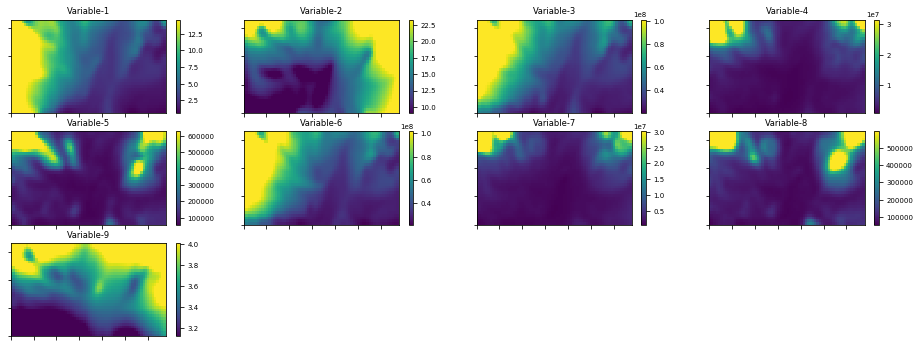

In [29]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=4, which_dim="all", cmap='jet', denormalize=True)
plt.show()

Showing selected components. Select components by specifying the index in 'which_dim=[...]' argument.

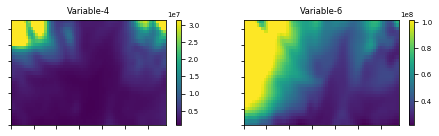

In [30]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=4, which_dim=[3,5], cmap='viridis', denormalize=True)
plt.show()

### Hits-map 

This visualization is very important because it shows how the instances/observations/rawd ata are spreaded across the SOM lattice. The more instances lay into a cell, the more instances it is representing and hence the more we have to take it into acount.

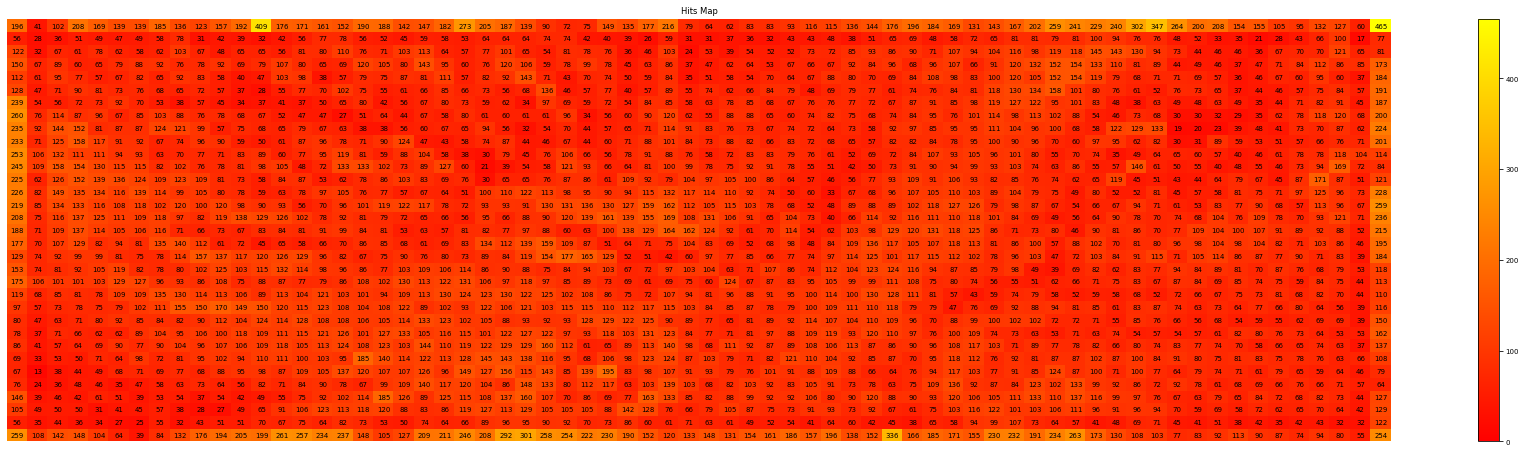

In [31]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(31,59,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

### Clustering 

This visualization helps us to focus on the groups which share similar characteristics

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


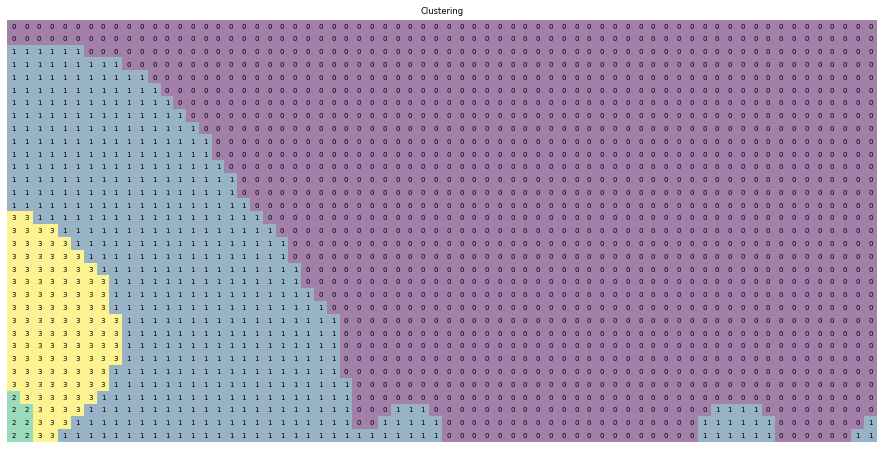

In [32]:
from sompy.visualization.hitmap import HitMapView
som.cluster(4)
map_labels=som.cluster(4)

hits  = HitMapView(30, 59,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

Render the U-matrix of the SOM:

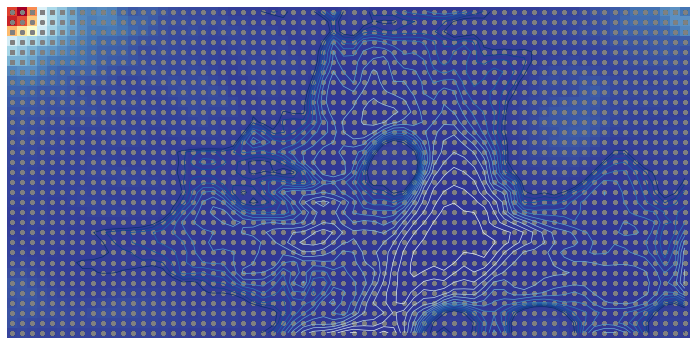

In [33]:
u = sompy.umatrix.UMatrixView(30, 59, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


Retrieveing the clustered data:

In [34]:
## Create a new dataframe of the Raw Data to add the BMU and Cluester to

MAVEN_data_SOM = MAVEN_data

## Retrieve the BMUs of each Raw Data

BMU=som._bmu[0]
MAVEN_data_SOM['BMU']=BMU
MAVEN_data_SOM.astype({'BMU': 'int64'}).dtypes

#MAVEN_data_SOM.dtypes

SOLAR_WIND_ELECTRON_DENSITY          float64
SOLAR_WIND_ELECTRON_TEMPERATURE      float64
ELECTRON_PARALLEL_FLUX_LOW             int64
ELECTRON_PARALLEL_FLUX_MID             int64
ELECTRON_PARALLEL_FLUX_HIGH            int64
ELECTRON_ANTI_PARALLEL_FLUX_LOW        int64
ELECTRON_ANTI_PARALLEL_FLUX_MID        int64
ELECTRON_ANTI_PARALLEL_FLUX_HIGH       int64
ELECTRON_SPECTRUM_SHAPE_PARAMETER    float64
BMU                                    int64
dtype: object

In [35]:
## Creating a dictionary to relate Raw Data BMU to Cluster of the BMU:
keys_bmu = list(pd.Series(range(0,len(map_labels))))
values_clust =  list(map_labels)
bmu_clust = {keys_bmu[i]: values_clust[i] for i in range(len(keys_bmu))}
#print(len(keys_bmu))
#print(len(bmu_clust))
#print(len(values_clust))
#print(bmu_clust) #uncomment this to check the resulting dicitonary

Map the Cluster to the Raw Data using the BMU-Cluster dictionary above:

In [36]:
MAVEN_data_SOM['Cluster']=""
MAVEN_data_SOM['Cluster']=MAVEN_data_SOM['BMU'].map(bmu_clust)

MAVEN_data_SOM.head() #uncomment to check the resulting dataframe

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_TEMPERATURE,ELECTRON_PARALLEL_FLUX_LOW,ELECTRON_PARALLEL_FLUX_MID,ELECTRON_PARALLEL_FLUX_HIGH,ELECTRON_ANTI_PARALLEL_FLUX_LOW,ELECTRON_ANTI_PARALLEL_FLUX_MID,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,ELECTRON_SPECTRUM_SHAPE_PARAMETER,BMU,Cluster
0,7.53,27.5,67700000,19100000,75800,67600000,23400000,55100,4.397,54.0,1
1,8.97,28.4,76000000,36800000,130000,83800000,27000000,41900,4.399,55.0,1
2,3.86,25.9,43300000,6330000,50900,40400000,11200000,87800,4.521,50.0,0
3,5.98,24.7,53200000,13300000,64500,47500000,15500000,41700,4.390,119.0,0
4,8.17,28.0,65300000,33200000,36200,60000000,40600000,101000,4.495,55.0,1


Also, check the concept of assigning 'clustering variables' before SOM training. The Air Flight data seems to have used 'clustering variables' before SOM training. Check this paper (already downloaded): https://ieeexplore.ieee.org/document/1199016

## Discussion of Results

Now that we have clustered the Raw Data based on the trained SOM, we can now look into each group of data and discuss the patterns in each.

Graphical rendering of the variables in each cluster helps in examining the trends.

### Subset the Raw Data according to Cluster

Use now the original time-series MAVEN data and add the BMU and Cluster data columns:

In [37]:
# create a new DataFrame from the MAVEN-timeSeries
# this dedicated daraframe has the time-date, BMU and Cluster
MAVEN_data_timeSeries_SOM=MAVEN_data_timeSeries
MAVEN_data_timeSeries_SOM['BMU']=""
MAVEN_data_timeSeries_SOM['Cluster']=""

# add the BMU data column
MAVEN_data_timeSeries_SOM['BMU']=BMU

# map the Cluster to each raw data
MAVEN_data_timeSeries_SOM['Cluster']=MAVEN_data_timeSeries_SOM['BMU'].map(bmu_clust)

Create a dataframe for each Cluster:

In [38]:
Cluster_0 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([0])]
Cluster_1 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([1])]
Cluster_2 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([2])]
Cluster_3 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([3])]

# check the length(no. of observations) of each cluster:
print("Cluster 0 No. Obs.: " + str(len(Cluster_0)))
print("Cluster 1 No. Obs.: " + str(len(Cluster_1)))
print("Cluster 2 No. Obs.: " + str(len(Cluster_2)))
print("Cluster 3 No. Obs.: " + str(len(Cluster_3)))

Cluster 0 No. Obs.: 142705
Cluster 1 No. Obs.: 47489
Cluster 2 No. Obs.: 625
Cluster 3 No. Obs.: 12619


In [39]:
# make sure subsetting is corretcly done; check the 'Cluster' column data/last column
Cluster_2

,Unnamed: 0,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER,BMU,Cluster
677,2018-05-15T03:04:24,39.6,0.000006,32.6,0.000008,267000000,1050000,156000000,1100000,1500000,140000,307000000,1590000,272000000,2140000,1760000,208000,4.310,136.0,2
687,2018-05-15T03:06:00,38.3,0.000006,27.5,0.000007,347000000,1310000,77700000,784000,956000,116000,290000000,2120000,188000000,2270000,1820000,263000,4.444,204.0,2
689,2018-05-15T03:06:16,44.3,0.000006,33.9,0.000007,446000000,1580000,76500000,753000,2100000,169000,476000000,2080000,202000000,1780000,2330000,217000,5.102,204.0,2
698,2018-05-15T03:07:28,59.5,0.000008,24.9,0.000006,390000000,1430000,84700000,820000,1680000,156000,432000000,1860000,133000000,1280000,3050000,254000,4.338,204.0,2
701,2018-05-15T03:07:52,53.1,0.000007,27.5,0.000006,486000000,1600000,80200000,782000,2450000,184000,504000000,2520000,183000000,1800000,3060000,283000,4.560,204.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200977,2018-06-28T18:00:56,23.2,0.000004,43.5,0.000012,156000000,798000,329000000,1870000,2820000,204000,168000000,788000,413000000,1980000,5930000,276000,4.565,1.0,2
200988,2018-06-28T18:02:24,28.4,0.000005,31.4,0.000008,185000000,862000,279000000,1610000,4220000,250000,189000000,850000,322000000,1720000,4900000,255000,4.164,1.0,2
200992,2018-06-28T18:02:56,17.8,0.000003,53.9,0.000015,138000000,754000,274000000,1570000,7130000,326000,148000000,771000,367000000,1900000,6490000,299000,4.986,1.0,2
202717,2018-06-28T22:19:44,12.9,0.000003,46.2,0.000016,98500000,596000,264000000,1650000,1510000,156000,102000000,576000,250000000,1470000,1950000,157000,4.445,137.0,2


Now that the observations are grouped based on SOM clusters:
- use descriptive stats tools such as histogram, x-y scatter, etc.
- use PyDivide visual analysis tools together with the 'date-time' information from the SOM clusters to find explanations for grouping of observations.

### Using the variable "Electron eflux  Parallel (100-500 ev) Quality":

- the U-matix shows that the region of distinct values are close to the Cluster 3 region
- based on the U-matrix and the cluster plots of the SOM, the variable that is intense at Cluster 3 is variable "Electron eflux  Parallel (100-500 ev) Quality"
- So,let us examine the variabale "Electron eflux  Parallel (100-500 ev) Quality"
- The histogram plots are not easy to distingush from this graph. Try separating the plots at the same x-axis range.

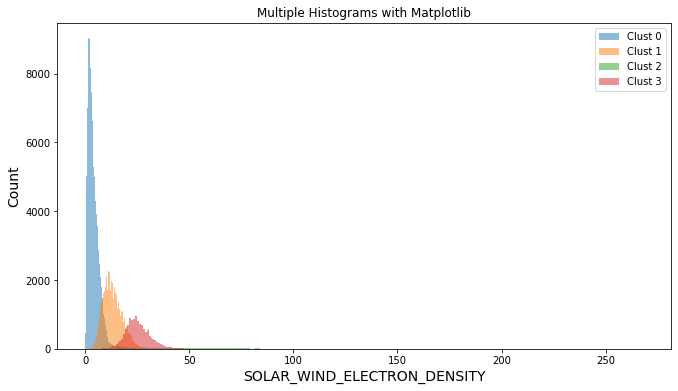

In [42]:
plt.figure(figsize=(11,6))
#plt.hist(Cluster_0['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
#plt.hist(Cluster_1['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
#plt.hist(Cluster_2['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
#plt.hist(Cluster_3['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.hist(Cluster_0['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("SOLAR_WIND_ELECTRON_DENSITY", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")


- Separating the histograms:

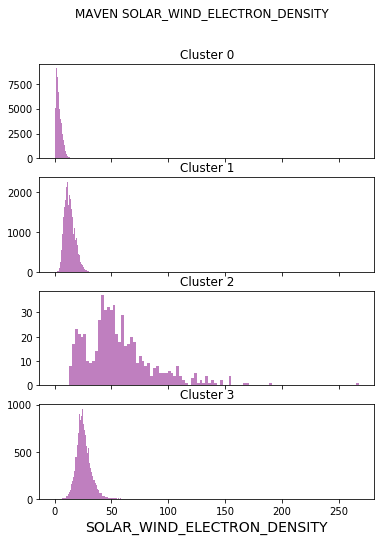

In [43]:
fig1, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig1.suptitle('MAVEN SOLAR_WIND_ELECTRON_DENSITY')
axs[0].hist(Cluster_0['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("SOLAR_WIND_ELECTRON_DENSITY", size=14)

fig1.savefig("figrue_separated_plots - Electron eflux  Parallel (100-500 ev) Quality.png")

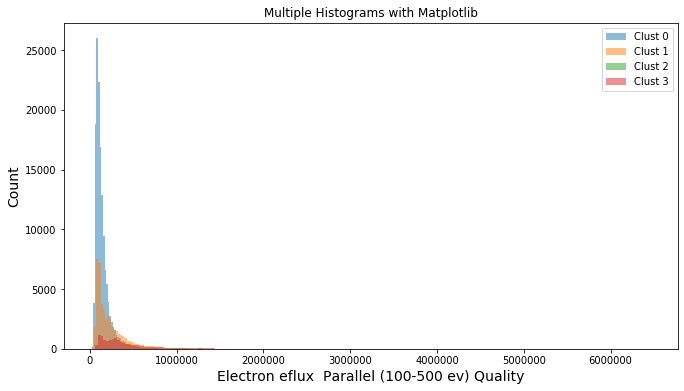

In [40]:
plt.figure(figsize=(11,6))
#plt.hist(Cluster_0['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
#plt.hist(Cluster_1['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
#plt.hist(Cluster_2['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
#plt.hist(Cluster_3['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.hist(Cluster_0['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("Electron eflux  Parallel (100-500 ev) Quality", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")


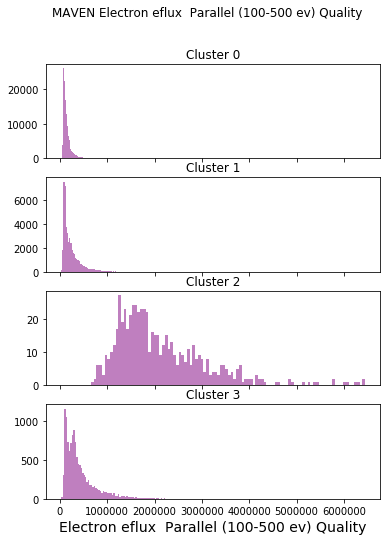

In [41]:
fig1, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig1.suptitle('MAVEN Electron eflux  Parallel (100-500 ev) Quality')
axs[0].hist(Cluster_0['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("Electron eflux  Parallel (100-500 ev) Quality", size=14)

fig1.savefig("figrue_separated_plots - Electron eflux  Parallel (100-500 ev) Quality.png")

Based on these histograms, Cluster 3 observations have relatively higher levels of "Electron eflux  Parallel (100-500 ev) Quality".

This is an interesting pattern. Let's examine further Cluster 2. How about checking the other 16 variables in the data?

### Using the variable "ELECTRON_PARALLEL_FLUX_MID": 

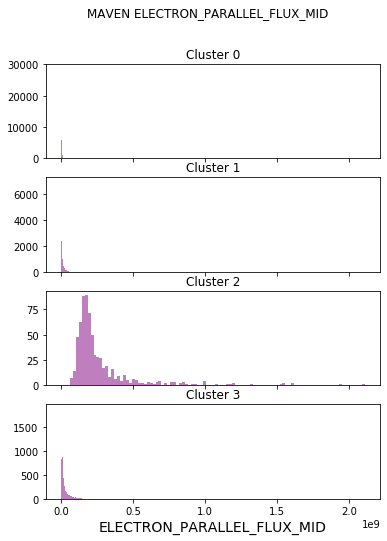

In [39]:
fig2, axs2 = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig2.suptitle('MAVEN ELECTRON_PARALLEL_FLUX_MID')
axs2[0].hist(Cluster_0['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs2[0].set_title('Cluster 0')
axs2[1].hist(Cluster_1['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs2[1].set_title('Cluster 1')
axs2[2].hist(Cluster_2['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs2[2].set_title('Cluster 2')
axs2[3].hist(Cluster_3['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs2[3].set_title('Cluster 3')

plt.xlabel("ELECTRON_PARALLEL_FLUX_MID", size=14)

fig2.savefig("figrue_separated_plots - MAVEN ELECTRON_PARALLEL_FLUX_MID.png")

### Using the variable "Electron eflux  Anti-par (500-1000 ev) Quality":

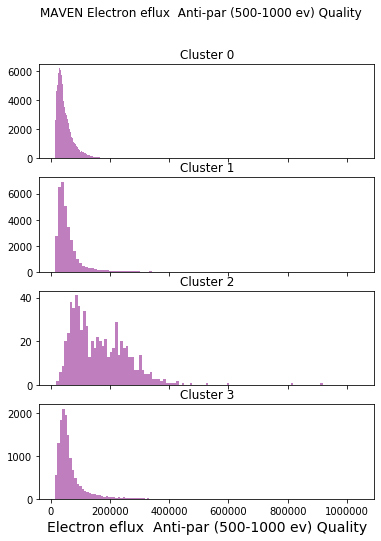

In [40]:
fig3, axs3 = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig3.suptitle('MAVEN Electron eflux  Anti-par (500-1000 ev) Quality')
axs3[0].hist(Cluster_0['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs3[0].set_title('Cluster 0')
axs3[1].hist(Cluster_1['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs3[1].set_title('Cluster 1')
axs3[2].hist(Cluster_2['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs3[2].set_title('Cluster 2')
axs3[3].hist(Cluster_3['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs3[3].set_title('Cluster 3')

plt.xlabel("Electron eflux  Anti-par (500-1000 ev) Quality", size=14)

fig3.savefig("figrue_separated_plots - Electron eflux  Anti-par (500-1000 ev) Quality.png")

### Using the variable "SOLAR_WIND_ELECTRON_DENSITY":

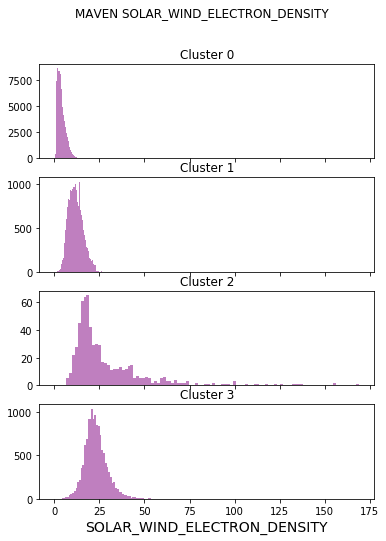

In [41]:
fig4, axs4 = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig4.suptitle('MAVEN SOLAR_WIND_ELECTRON_DENSITY')
axs4[0].hist(Cluster_0['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs4[0].set_title('Cluster 0')
axs4[1].hist(Cluster_1['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs4[1].set_title('Cluster 1')
axs4[2].hist(Cluster_2['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs4[2].set_title('Cluster 2')
axs4[3].hist(Cluster_3['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs4[3].set_title('Cluster 3')

plt.xlabel("SOLAR_WIND_ELECTRON_DENSITY", size=14)

fig4.savefig("figrue_separated_plots - SOLAR_WIND_ELECTRON_DENSITY.png")

### How about incorporating the observations from other isntruments?

We use the date-time data as the common index for the SWEA clustered data with the other instruments such as:

- SWIA
- NGIMS
- SPACECRAFT
- etc.

Taking the SWIA data:

In [45]:
insitu_SWIA = insitu.get("SWIA")
insitu_SWIA.head()

,HPLUS_DENSITY,HPLUS_DENSITY_QUAL,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_X_QUAL,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Y_QUAL,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_FLOW_VELOCITY_MSO_Z_QUAL,HPLUS_TEMPERATURE,HPLUS_TEMPERATURE_QUAL,SOLAR_WIND_DYNAMIC_PRESSURE,SOLAR_WIND_DYNAMIC_PRESSURE_QUAL
2018-06-02T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-02T00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-02T00:00:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-02T00:00:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-02T00:00:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for the NaN or Null entries:

In [46]:
insitu_SWIA.isnull().sum()

HPLUS_DENSITY                       220
HPLUS_DENSITY_QUAL                  193
HPLUS_FLOW_VELOCITY_MSO_X           220
HPLUS_FLOW_VELOCITY_MSO_X_QUAL      193
HPLUS_FLOW_VELOCITY_MSO_Y           220
HPLUS_FLOW_VELOCITY_MSO_Y_QUAL      193
HPLUS_FLOW_VELOCITY_MSO_Z           220
HPLUS_FLOW_VELOCITY_MSO_Z_QUAL      193
HPLUS_TEMPERATURE                   220
HPLUS_TEMPERATURE_QUAL              193
SOLAR_WIND_DYNAMIC_PRESSURE         220
SOLAR_WIND_DYNAMIC_PRESSURE_QUAL    193
dtype: int64

Removing the Nan or Null entries and make sure there is still significanly huge dataset:

In [47]:
insitu_SWIA_clean = insitu_SWIA.dropna()
insitu_SWIA_clean.count()

HPLUS_DENSITY                       316128
HPLUS_DENSITY_QUAL                  316128
HPLUS_FLOW_VELOCITY_MSO_X           316128
HPLUS_FLOW_VELOCITY_MSO_X_QUAL      316128
HPLUS_FLOW_VELOCITY_MSO_Y           316128
HPLUS_FLOW_VELOCITY_MSO_Y_QUAL      316128
HPLUS_FLOW_VELOCITY_MSO_Z           316128
HPLUS_FLOW_VELOCITY_MSO_Z_QUAL      316128
HPLUS_TEMPERATURE                   316128
HPLUS_TEMPERATURE_QUAL              316128
SOLAR_WIND_DYNAMIC_PRESSURE         316128
SOLAR_WIND_DYNAMIC_PRESSURE_QUAL    316128
dtype: int64

In [48]:

insitu_SWIA_clean = pd.DataFrame(insitu_SWIA_clean)
insitu_SWIA_clean

,HPLUS_DENSITY,HPLUS_DENSITY_QUAL,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_X_QUAL,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Y_QUAL,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_FLOW_VELOCITY_MSO_Z_QUAL,HPLUS_TEMPERATURE,HPLUS_TEMPERATURE_QUAL,SOLAR_WIND_DYNAMIC_PRESSURE,SOLAR_WIND_DYNAMIC_PRESSURE_QUAL
2018-06-02T00:00:52,0.0235,0.25,-39.9,0.25,25.2,0.25,35.0,0.25,323.0,0.25,0.000138,0.25
2018-06-02T00:00:56,0.0222,0.25,-41.3,0.25,22.7,0.25,42.5,0.25,363.0,0.25,0.000168,0.25
2018-06-02T00:01:00,0.0216,0.25,-41.7,0.25,28.0,0.25,55.3,0.25,372.0,0.25,0.000228,0.25
2018-06-02T00:01:04,0.0209,0.25,-34.6,0.25,18.6,0.25,24.8,0.25,339.0,0.25,0.000079,0.25
2018-06-02T00:01:08,0.0211,0.25,-22.4,0.25,21.0,0.25,35.8,0.25,406.0,0.25,0.000081,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-28T23:59:12,6.1700,1.00,-377.0,1.00,159.0,1.00,146.0,1.00,157.0,1.00,1.940000,1.00
2018-06-28T23:59:20,6.5800,1.00,-367.0,1.00,159.0,1.00,149.0,1.00,138.0,1.00,2.000000,1.00
2018-06-28T23:59:28,6.4900,1.00,-350.0,1.00,146.0,1.00,122.0,1.00,165.0,1.00,1.720000,1.00
2018-06-28T23:59:36,6.0300,1.00,-352.0,1.00,142.0,1.00,129.0,1.00,142.0,1.00,1.620000,1.00


Save the cleaned dataframe of SWIA:

In [49]:
insitu_SWIA_clean.to_excel('Data_SWIA.xlsx')

Retrieve the saved spreadsheet file for the SWIA dataset:

In [62]:
MAVEN_data_SWIA_timeSeries = pd.read_excel('/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works/on_MAVEN_data/Data_SWIA.xlsx')

In [63]:
MAVEN_data_SWIA_timeSeries.head()

,Unnamed: 0,HPLUS_DENSITY,HPLUS_DENSITY_QUAL,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_X_QUAL,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Y_QUAL,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_FLOW_VELOCITY_MSO_Z_QUAL,HPLUS_TEMPERATURE,HPLUS_TEMPERATURE_QUAL,SOLAR_WIND_DYNAMIC_PRESSURE,SOLAR_WIND_DYNAMIC_PRESSURE_QUAL
0,2018-06-02T00:00:52,0.0235,0.25,-39.9,0.25,25.2,0.25,35.0,0.25,323.0,0.25,0.000138,0.25
1,2018-06-02T00:00:56,0.0222,0.25,-41.3,0.25,22.7,0.25,42.5,0.25,363.0,0.25,0.000168,0.25
2,2018-06-02T00:01:00,0.0216,0.25,-41.7,0.25,28.0,0.25,55.3,0.25,372.0,0.25,0.000228,0.25
3,2018-06-02T00:01:04,0.0209,0.25,-34.6,0.25,18.6,0.25,24.8,0.25,339.0,0.25,0.000079,0.25
4,2018-06-02T00:01:08,0.0211,0.25,-22.4,0.25,21.0,0.25,35.8,0.25,406.0,0.25,0.000081,0.25


In [84]:
MAVEN_data_SWIA_timeSeries.count()

Unnamed: 0                          316128
HPLUS_DENSITY                       316128
HPLUS_DENSITY_QUAL                  316128
HPLUS_FLOW_VELOCITY_MSO_X           316128
HPLUS_FLOW_VELOCITY_MSO_X_QUAL      316128
HPLUS_FLOW_VELOCITY_MSO_Y           316128
HPLUS_FLOW_VELOCITY_MSO_Y_QUAL      316128
HPLUS_FLOW_VELOCITY_MSO_Z           316128
HPLUS_FLOW_VELOCITY_MSO_Z_QUAL      316128
HPLUS_TEMPERATURE                   316128
HPLUS_TEMPERATURE_QUAL              316128
SOLAR_WIND_DYNAMIC_PRESSURE         316128
SOLAR_WIND_DYNAMIC_PRESSURE_QUAL    316128
dtype: int64

When using the SWIA from the saved spreadsheet, the date-time column is the first column and hence part of the data entries. So, use this dataframe so the date-time data column may be easily accessed to work with the SWEA dataframe:

In [64]:
MAVEN_data_SWIA_timeSeries.iloc[:,0]

0         2018-06-02T00:00:52
1         2018-06-02T00:00:56
2         2018-06-02T00:01:00
3         2018-06-02T00:01:04
4         2018-06-02T00:01:08
                 ...         
316123    2018-06-28T23:59:12
316124    2018-06-28T23:59:20
316125    2018-06-28T23:59:28
316126    2018-06-28T23:59:36
316127    2018-06-28T23:59:44
Name: Unnamed: 0, Length: 316128, dtype: object

In [65]:
insitu_SWIA_clean.iloc[:,0]

2018-06-02T00:00:52    0.0235
2018-06-02T00:00:56    0.0222
2018-06-02T00:01:00    0.0216
2018-06-02T00:01:04    0.0209
2018-06-02T00:01:08    0.0211
                        ...  
2018-06-28T23:59:12    6.1700
2018-06-28T23:59:20    6.5800
2018-06-28T23:59:28    6.4900
2018-06-28T23:59:36    6.0300
2018-06-28T23:59:44    6.1500
Name: HPLUS_DENSITY, Length: 316128, dtype: float64

....work now on merging this SWIA and the clustered SWEA....

In [66]:
MAVEN_data_timeSeries_SOM.columns

Index(['Unnamed: 0', 'SOLAR_WIND_ELECTRON_DENSITY',
       'SOLAR_WIND_ELECTRON_DENSITY_QUAL', 'SOLAR_WIND_ELECTRON_TEMPERATURE',
       'SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL', 'ELECTRON_PARALLEL_FLUX_LOW',
       'Electron eflux  Parallel (5-100 ev) Quality',
       'ELECTRON_PARALLEL_FLUX_MID',
       'Electron eflux  Parallel (100-500 ev) Quality',
       'ELECTRON_PARALLEL_FLUX_HIGH',
       'Electron eflux  Parallel (500-1000 ev) Quality',
       'ELECTRON_ANTI_PARALLEL_FLUX_LOW',
       'Electron eflux  Anti-par (5-100 ev) Quality',
       'ELECTRON_ANTI_PARALLEL_FLUX_MID',
       'Electron eflux  Anti-par (100-500 ev) Quality',
       'ELECTRON_ANTI_PARALLEL_FLUX_HIGH',
       'Electron eflux  Anti-par (500-1000 ev) Quality',
       'ELECTRON_SPECTRUM_SHAPE_PARAMETER', 'BMU', 'Cluster'],
      dtype='object')

In [77]:
MAVEN_data_SWEA_timeSeries_SOM=MAVEN_data_timeSeries_SOM.rename(columns={'Unnamed: 0':'Time1'})

MAVEN_data_SWEA_timeSeries_SOM.head()
#MAVEN_data_timeSeries_SOM[]

,Time1,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER,BMU,Cluster
0,2018-06-02T00:19:12,1.41,7.310000e-07,11.40,0.000009,35200000,946000,713000,164000,94700,66900,41100000,388000,892000,76800,64600,31000,2.249,34.0,0
1,2018-06-02T00:20:48,1.55,7.840000e-07,9.60,0.000008,25700000,1250000,874000,260000,162000,109000,33200000,331000,745000,64300,73300,31400,2.614,35.0,0
2,2018-06-02T00:23:52,5.10,1.590000e-06,10.50,0.000005,33300000,609000,1660000,158000,103000,63900,39700000,365000,1300000,89800,26600,18800,2.739,177.0,0
3,2018-06-02T00:26:08,1.66,8.210000e-07,9.92,0.000008,21200000,696000,786000,153000,103000,67200,23900000,290000,1010000,80200,66100,33000,2.703,177.0,0
4,2018-06-02T00:27:28,4.62,1.470000e-06,11.70,0.000006,34300000,620000,1420000,148000,111000,60900,37000000,353000,1220000,87600,68100,30800,3.101,295.0,0


In [78]:
MAVEN_data_SWIA_timeSeries_SOM=MAVEN_data_SWIA_timeSeries.rename(columns={'Unnamed: 0':'Time2'})
MAVEN_data_SWIA_timeSeries_SOM.head()

,Time2,HPLUS_DENSITY,HPLUS_DENSITY_QUAL,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_X_QUAL,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Y_QUAL,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_FLOW_VELOCITY_MSO_Z_QUAL,HPLUS_TEMPERATURE,HPLUS_TEMPERATURE_QUAL,SOLAR_WIND_DYNAMIC_PRESSURE,SOLAR_WIND_DYNAMIC_PRESSURE_QUAL
0,2018-06-02T00:00:52,0.0235,0.25,-39.9,0.25,25.2,0.25,35.0,0.25,323.0,0.25,0.000138,0.25
1,2018-06-02T00:00:56,0.0222,0.25,-41.3,0.25,22.7,0.25,42.5,0.25,363.0,0.25,0.000168,0.25
2,2018-06-02T00:01:00,0.0216,0.25,-41.7,0.25,28.0,0.25,55.3,0.25,372.0,0.25,0.000228,0.25
3,2018-06-02T00:01:04,0.0209,0.25,-34.6,0.25,18.6,0.25,24.8,0.25,339.0,0.25,0.000079,0.25
4,2018-06-02T00:01:08,0.0211,0.25,-22.4,0.25,21.0,0.25,35.8,0.25,406.0,0.25,0.000081,0.25


In [80]:
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM=MAVEN_data_SWEA_timeSeries_SOM.merge(MAVEN_data_SWIA_timeSeries_SOM, left_on='Time1', right_on='Time2')
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM.head()

,Time1,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,...,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_X_QUAL,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Y_QUAL,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_FLOW_VELOCITY_MSO_Z_QUAL,HPLUS_TEMPERATURE,HPLUS_TEMPERATURE_QUAL,SOLAR_WIND_DYNAMIC_PRESSURE,SOLAR_WIND_DYNAMIC_PRESSURE_QUAL
0,2018-06-02T00:19:12,1.41,7.310000e-07,11.40,0.000009,35200000,946000,713000,164000,94700,...,-20.4,0.25,-28.10,0.25,-9.31,0.25,187.0,0.25,0.000106,0.25
1,2018-06-02T00:20:48,1.55,7.840000e-07,9.60,0.000008,25700000,1250000,874000,260000,162000,...,-13.2,0.25,-23.20,0.25,-9.09,0.25,256.0,0.25,0.000057,0.25
2,2018-06-02T00:23:52,5.10,1.590000e-06,10.50,0.000005,33300000,609000,1660000,158000,103000,...,-53.2,0.25,-1.23,0.25,-27.20,0.25,92.4,0.25,0.000879,0.25
3,2018-06-02T00:26:08,1.66,8.210000e-07,9.92,0.000008,21200000,696000,786000,153000,103000,...,-97.7,0.25,-3.35,0.25,-64.20,0.25,65.5,0.25,0.006900,0.25
4,2018-06-02T00:27:28,4.62,1.470000e-06,11.70,0.000006,34300000,620000,1420000,148000,111000,...,-100.0,0.25,28.50,0.25,-59.90,0.25,65.0,0.25,0.039000,0.25


In [ ]:
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM.count()

In [81]:
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM.to_excel('Data_SWEA_SWIA_mergedTime.xlsx')

Subsetting the SWEA-SWIA dataset into cluster based on SWEA:

In [82]:
Merged_Cluster_0 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([0])]
Merged_Cluster_1 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([1])]
Merged_Cluster_2 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([2])]
Merged_Cluster_3 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([3])]

# check the length(no. of observations) of each cluster:
print("Cluster 0 No. Obs.: " + str(len(Merged_Cluster_0)))
print("Cluster 1 No. Obs.: " + str(len(Merged_Cluster_1)))
print("Cluster 2 No. Obs.: " + str(len(Merged_Cluster_2)))
print("Cluster 3 No. Obs.: " + str(len(Merged_Cluster_3)))

Cluster 0 No. Obs.: 86176
Cluster 1 No. Obs.: 33734
Cluster 2 No. Obs.: 674
Cluster 3 No. Obs.: 13687


### Using the SWIA variable "HPLUS_DENSITY": 

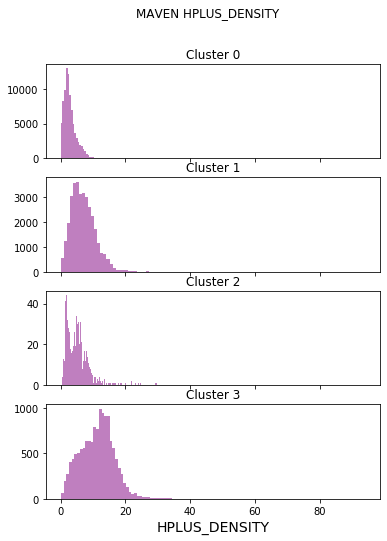

In [86]:
fig11, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig11.suptitle('MAVEN HPLUS_DENSITY')
axs[0].hist(Merged_Cluster_0['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Merged_Cluster_1['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Merged_Cluster_2['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Merged_Cluster_3['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("HPLUS_DENSITY", size=14)

fig11.savefig("figrue_separated_plots_merged - HPLUS_DENSITY.png")


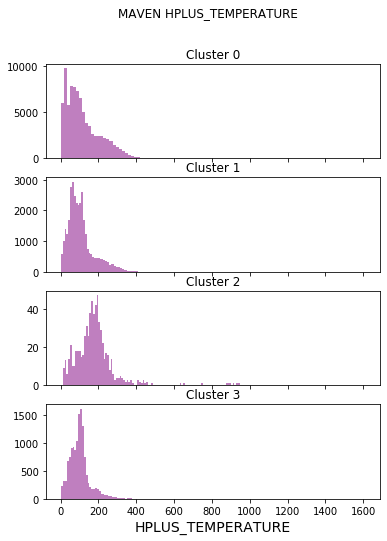

In [88]:

fig12, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig12.suptitle('MAVEN HPLUS_TEMPERATURE')
axs[0].hist(Merged_Cluster_0['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Merged_Cluster_1['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Merged_Cluster_2['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Merged_Cluster_3['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("HPLUS_TEMPERATURE", size=14)

fig12.savefig("figrue_separated_plots_merged - HPLUS_TEMPERATURE.png")

## What if SWIA-data only is trained on SOM?

In [90]:
MAVEN_data_SWIA_forSOM = MAVEN_data_SWIA_timeSeries.iloc[:,1:]
MAVEN_data_SWIA_forSOM.head()

,HPLUS_DENSITY,HPLUS_DENSITY_QUAL,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_X_QUAL,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Y_QUAL,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_FLOW_VELOCITY_MSO_Z_QUAL,HPLUS_TEMPERATURE,HPLUS_TEMPERATURE_QUAL,SOLAR_WIND_DYNAMIC_PRESSURE,SOLAR_WIND_DYNAMIC_PRESSURE_QUAL
0,0.0235,0.25,-39.9,0.25,25.2,0.25,35.0,0.25,323.0,0.25,0.000138,0.25
1,0.0222,0.25,-41.3,0.25,22.7,0.25,42.5,0.25,363.0,0.25,0.000168,0.25
2,0.0216,0.25,-41.7,0.25,28.0,0.25,55.3,0.25,372.0,0.25,0.000228,0.25
3,0.0209,0.25,-34.6,0.25,18.6,0.25,24.8,0.25,339.0,0.25,0.000079,0.25
4,0.0211,0.25,-22.4,0.25,21.0,0.25,35.8,0.25,406.0,0.25,0.000081,0.25


In [95]:
map_size_SWIA = sompy.SOMFactory().build(MAVEN_data_SWIA_forSOM.values).calculate_map_size('rect')
print("Optimal Map Size (row, column):" + str(map_size_SWIA))

/opt/anaconda3/lib/python3.7/site-packages/sompy/sompy.py:673: ComplexWarning: Casting complex values to real discards the imaginary part
  return [int(size1), int(size2)]


Optimal Map Size (row, column):[43, 65]


In [103]:
%%time
# Train the model with different parameters. 
# The more, the better. 

som_SWIA = sompy.SOMFactory().build(MAVEN_data_SWIA_forSOM.values, 
                                   #mapsize=map_size_SWIA,
                                    mapsize=[30,50],
                                   normalization = 'var', 
                                   initialization='random', 
                                   #component_names=component_names, 
                                   lattice='rect')
som_SWIA.train(n_job=1, train_rough_len=5, train_finetune_len=10) # change the number of iteration of rouhg_len and finetune _len

 Training...
 random_initialization took: 0.022000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 5

 epoch: 1 ---> elapsed time:  10.786000, quantization error: 4.853073

 epoch: 2 ---> elapsed time:  9.443000, quantization error: 3.162372

 epoch: 3 ---> elapsed time:  9.503000, quantization error: 1.792242

 epoch: 4 ---> elapsed time:  9.341000, quantization error: 1.532209

 epoch: 5 ---> elapsed time:  11.468000, quantization error: 1.272707

 Finetune training...
 radius_ini: 4.166667 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  9.343000, quantization error: 1.010651

 epoch: 2 ---> elapsed time:  12.136000, quantization error: 1.032040

 epoch: 3 ---> elapsed time:  9.792000, quantization error: 0.988092

 epoch: 4 ---> elapsed time:  12.055000, quantization error: 0.944475

 epoch: 5 ---> elapsed time:  10.985000, quantization error: 0.903179

 epoch: 6 ---> elapsed time:  9.450000, quantization error: 0.861014

 

CPU times: user 4min 7s, sys: 19.3 s, total: 4min 27s
Wall time: 2min 37s


In [98]:
topographic_error = som_SWIA.calculate_topographic_error()
quantization_error = som_SWIA.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.12882123696730438
 Quantization error = 0.09403900611163549


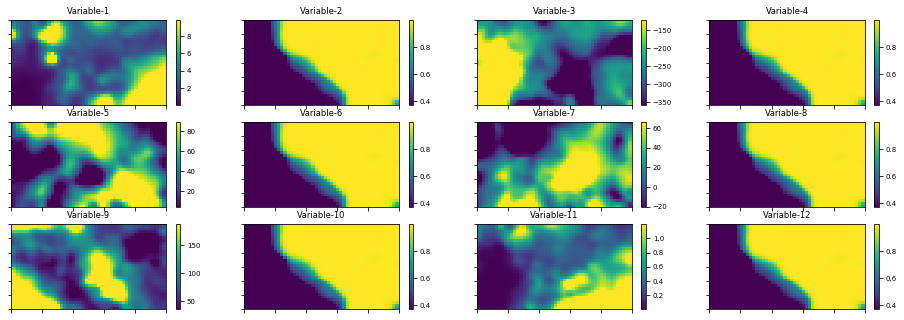

In [104]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som_SWIA, col_sz=4, which_dim="all", cmap='jet', denormalize=True)
plt.show()

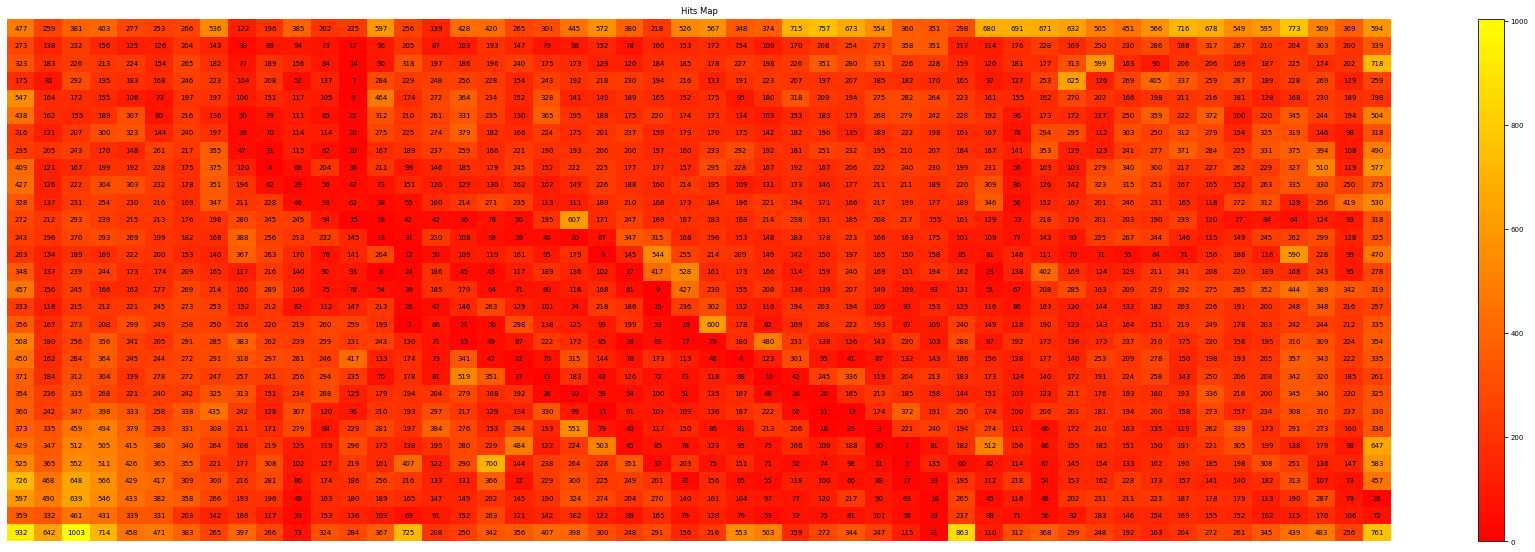

In [105]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(31,59,"Hits Map",text_size=7)
vhts.show(som_SWIA, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


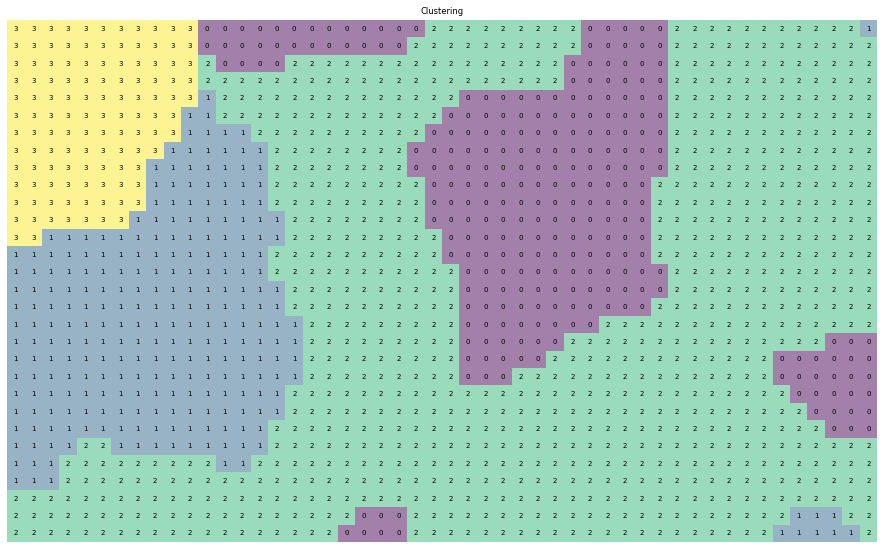

In [106]:
from sompy.visualization.hitmap import HitMapView
som_SWIA.cluster(4)
map_labels_SWIA=som_SWIA.cluster(4)

hits  = HitMapView(30, 59,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som_SWIA, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

The Clusters in this SWIA dataset seems all over the place, which is not the desired pattern in an SOM.

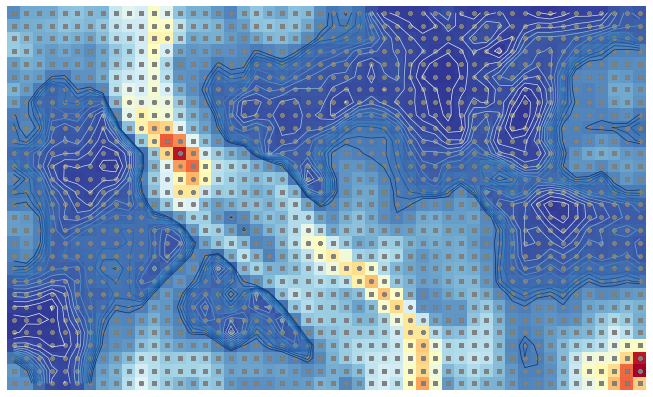

In [107]:
u = sompy.umatrix.UMatrixView(30, 59, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_SWIA, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som_SWIA, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


## References
This notebook has been created using the templates from:

https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11

http://www.vahidmoosavi.com

SOM Package: https://github.com/sevamoo/sompy

Pandas: https://pandas.pydata.org/